# Two-Body decay generator

In [23]:
import numpy as np
import pandas as pd
import math

## Let's create 100000 rows
ran1 = np.random.default_rng().uniform(low=0.,high=1.,size=[100000,1])
ran2 = np.random.default_rng().uniform(low=0.,high=1.,size=[100000,1])

## Creating the dataframes
df_ran1 = pd.DataFrame(ran1, columns=["ran1"])
df_ran2 = pd.DataFrame(ran2, columns=["ran2"])

df = pd.concat([df_ran1, df_ran2], axis=1, join='outer')

df['theta'] = np.arccos(1.-2.*df['ran1'])
df['phi'] = 2.*math.pi*df['ran2']

a1 = 22000
a2 = 939
Ed = 5

Ex = mf+mn+Ed
p1 = math.sqrt(abs((Ex*Ex - (a1+a2)*(a1+a2))*(Ex*Ex - (a1-a2)*(a1-a2))))/(2.*Ex);

df['pfx'] = p1*np.sin(df['theta'])*np.cos(df['phi'])
df['pfy'] = p1*np.sin(df['theta'])*np.sin(df['phi'])
df['pfz'] = p1*np.cos(df['theta'])
df['Ef'] = np.sqrt(a1*a1+p1*p1)

df['pnx'] = -df['pfx']
df['pny'] = -df['pfy']
df['pnz'] = -df['pfz']
df['En'] = np.sqrt(a2*a2+p1*p1)

df['Erel'] = np.sqrt(a1*a1 + a2*a2 + 2*df['Ef']*df['En'] - 2.*(df['pfx']*df['pnx']+df['pfy']*df['pny']+df['pfz']*df['pnz'])) - a1 - a2

df 

,ran1,ran2,theta,phi,pfx,pfy,pfz,Ef,pnx,pny,pnz,En,Erel
0,0.116144,0.444055,0.695534,2.790082,-57.161682,20.963570,72.943440,22000.205173,57.161682,-20.963570,-72.943440,943.794827,5.0
1,0.151590,0.059887,0.799841,0.376280,63.380638,25.042017,66.207754,22000.205173,-63.380638,-25.042017,-66.207754,943.794827,5.0
2,0.986184,0.535812,2.905966,3.366604,-21.622089,-4.949026,-92.388674,22000.205173,21.622089,4.949026,92.388674,943.794827,5.0
3,0.940739,0.192630,2.649781,1.210333,15.825263,41.984379,-83.752896,22000.205173,-15.825263,-41.984379,83.752896,943.794827,5.0
4,0.329984,0.849648,1.223846,5.338494,52.359976,-72.403840,32.307762,22000.205173,-52.359976,72.403840,-32.307762,943.794827,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.424712,0.921324,1.419646,5.788848,82.685677,-44.565323,14.306829,22000.205173,-82.685677,44.565323,-14.306829,943.794827,5.0
99996,0.443207,0.880822,1.456965,5.534367,69.146800,-64.264470,10.792241,22000.205173,-69.146800,64.264470,-10.792241,943.794827,5.0
99997,0.225750,0.660809,0.990226,4.151985,-42.227834,-67.293988,52.115294,22000.205173,42.227834,67.293988,-52.115294,943.794827,5.0
99998,0.601757,0.564475,1.775743,3.546702,-85.496045,-36.663202,-19.336765,22000.205173,85.496045,36.663202,19.336765,943.794827,5.0


<Figure size 640x480 with 0 Axes>

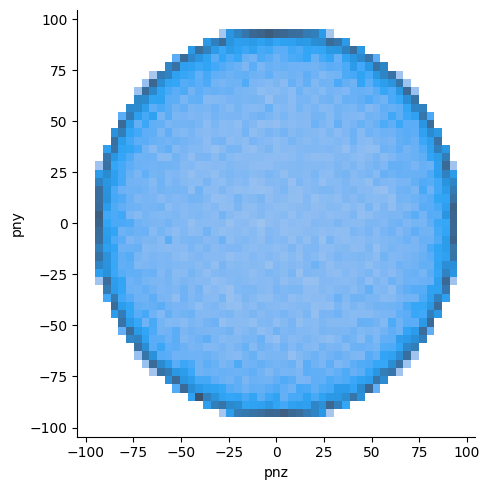

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="pnz", y="pny", data=df)
plt.tight_layout()